In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# Keras import(s)
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Dropout

# Custom imports
from funcs.plotting import plot_classifications, plot_training

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
from sklearn.model_selection import train_test_split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.5, shuffle=True)

In [4]:
x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1

x_train = x_train[:,:,:,np.newaxis] # Add a new axis to the end. This axis is used to specifiy the RGB channel, however, we are working with greyscale images here.
x_test  = x_test [:,:,:,np.newaxis]
input_shape = x_train.shape[1:]
n_classes   = 10 # we have 10 different classes, ie 10 integers from 0 to 9

In [5]:
# Connect input, intermediate, and output layers using the Keras functional API
i = Input(shape=input_shape)
x = Flatten()(i)
x = Dense(30, activation='relu')(x)
o = Dense(n_classes, activation='softmax')(x)

# Create Model
fcc = Model(i, o, name='Dense')
fcc.summary()

Model: "Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 1)]         0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1950      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 2,260
Trainable params: 2,260
Non-trainable params: 0
_________________________________________________________________


First, train for 100 epochs

In [6]:
fcc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_fcc = fcc.fit(x=x_train, y=y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 15ms/step - loss: 2.2550 - accuracy: 0.1671 - val_loss: 2.1281 - val_accuracy: 0.2889
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 2.0972 - accuracy: 0.3036 - val_loss: 2.0056 - val_accuracy: 0.4056
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1.9611 - accuracy: 0.4554 - val_loss: 1.8648 - val_accuracy: 0.5333
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 1.8079 - accuracy: 0.5474 - val_loss: 1.7105 - val_accuracy: 0.5556
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.6444 - accuracy: 0.5961 - val_loss: 1.5393 - val_accuracy: 0.6056
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 1.4736 - accuracy: 0.6379 - val_loss: 1.3762 - val_accuracy: 0.6500
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 1.3101 - accuracy: 0.7354 - val_loss: 1.2096 - val_accuracy: 0.7611
Epoch 8/100


In [7]:
history_fcc.history['val_accuracy'][-5:]

[0.949999988079071,
 0.949999988079071,
 0.9555555582046509,
 0.949999988079071,
 0.949999988079071]

Testing accuracy: 97.6%


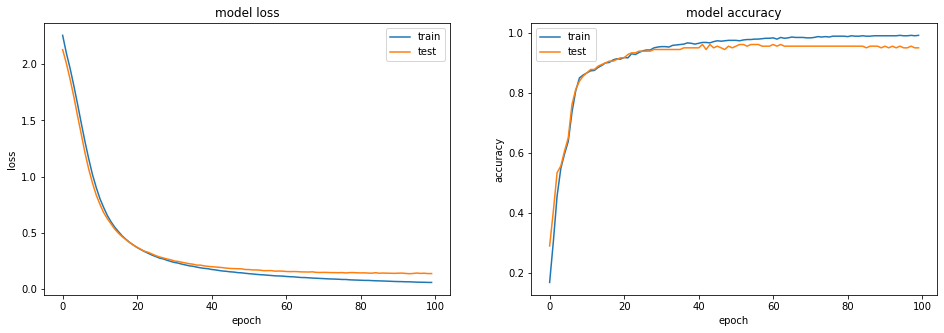

In [8]:
plot_training(history_fcc)

# Calculate accuracy on entire test set
_, acc = fcc.evaluate(x_test, y_test, verbose=0)
print("Testing accuracy: {:.1f}%".format(acc * 100.))

In [9]:
predicted = fcc.predict(x_test).argmax(axis=-1) # Use neural network to predict labels of test set

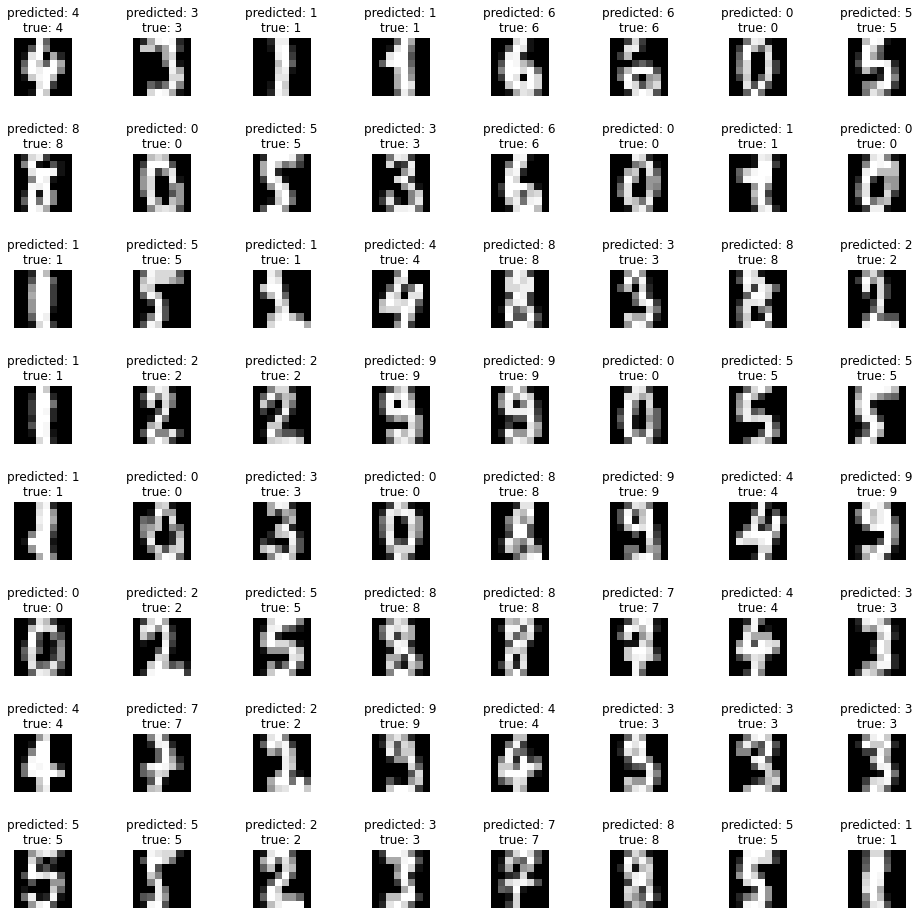

In [10]:
plot_classifications(x_test, y_test, predicted)

In [11]:
# Plot a random sample of test data with their predicitions


# Recompile your model and train your network for longer, what happens to your validation accuracy?

In [12]:
# Connect input, intermediate, and output layers using the Keras functional API
i = Input(shape=input_shape)
x = Flatten()(i)
x = Dense(30, activation='relu')(x)
o = Dense(n_classes, activation='softmax')(x)

# Create Model
fcc = Model(i, o, name='Dense')
fcc.summary()

Model: "Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8, 8, 1)]         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 2,260
Trainable params: 2,260
Non-trainable params: 0
_________________________________________________________________


In [13]:
fcc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_fcc = fcc.fit(x=x_train, y=y_train, epochs=300, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/300
23/23 [==============================] - 1s 12ms/step - loss: 2.2758 - accuracy: 0.1504 - val_loss: 2.1317 - val_accuracy: 0.2500
Epoch 2/300
23/23 [==============================] - 0s 4ms/step - loss: 2.0755 - accuracy: 0.3245 - val_loss: 1.9380 - val_accuracy: 0.5500
Epoch 3/300
23/23 [==============================] - 0s 4ms/step - loss: 1.8650 - accuracy: 0.6198 - val_loss: 1.7053 - val_accuracy: 0.7778
Epoch 4/300
23/23 [==============================] - 0s 4ms/step - loss: 1.6599 - accuracy: 0.7173 - val_loss: 1.5084 - val_accuracy: 0.8167
Epoch 5/300
23/23 [==============================] - 0s 4ms/step - loss: 1.4721 - accuracy: 0.7786 - val_loss: 1.3313 - val_accuracy: 0.8500
Epoch 6/300
23/23 [==============================] - 0s 5ms/step - loss: 1.3054 - accuracy: 0.8022 - val_loss: 1.1617 - val_accuracy: 0.8833
Epoch 7/300
23/23 [==============================] - 0s 5ms/step - loss: 1.1568 - accuracy: 0.8398 - val_loss: 1.0240 - val_accuracy: 0.8944
Epoch 8/300


Training accuracy: 99.6%
Testing accuracy: 97.0%


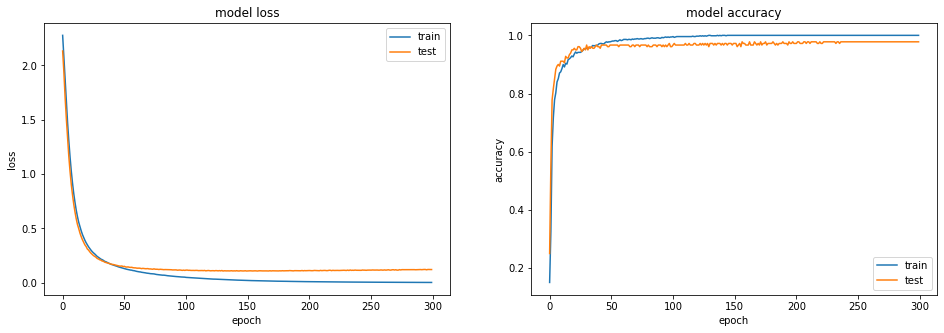

In [14]:
plot_training(history_fcc)

# Calculate accuracy on entire test set
_, train_acc = fcc.evaluate(x_train, y_train, verbose=0)
_, test_acc = fcc.evaluate(x_test, y_test, verbose=0)
print("Training accuracy: {:.1f}%".format(train_acc * 100.))
print("Testing accuracy: {:.1f}%".format(test_acc * 100.))

# There are a few techniques we can use to improve generalisation:
* Dropout
* Regularisation
* Data augmentation

Now implement dropout to improve generalisation

In [117]:
from tensorflow.keras.regularizers import l1_l2
# Connect input, intermediate, and output layers using the Keras functional API
i = Input(shape=input_shape)
x = Flatten()(i)
x = Dense(50, activation='relu', bias_regularizer=l1_l2())(x)
x = Dropout(0.2)(x)
o = Dense(n_classes, activation='softmax')(x)


# Create Model
fcc = Model(i, o, name='Dense')
fcc.summary()

Model: "Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 8, 8, 1)]         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                3250      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
Total params: 3,760
Trainable params: 3,760
Non-trainable params: 0
_________________________________________________________________


In [118]:
# # Snippet to randomly rotate images by up to 15 degrees
# from scipy.ndimage import rotate
# x_train_aug = np.array([rotate(x, angle=np.random.choice([-15,-10,-5,0,5,10,15], p=[0.01,0.02,0.02,0.9,0.02,0.02,0.01]), reshape=False) for x in x_train])

In [119]:

fcc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_fcc = fcc.fit(x=x_train, y=y_train, epochs=300, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/300
23/23 [==============================] - 0s 6ms/step - loss: 2.2937 - accuracy: 0.1421 - val_loss: 2.1429 - val_accuracy: 0.2222
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 2.0462 - accuracy: 0.3120 - val_loss: 1.8952 - val_accuracy: 0.5278
Epoch 3/300
23/23 [==============================] - 0s 2ms/step - loss: 1.8244 - accuracy: 0.5334 - val_loss: 1.6494 - val_accuracy: 0.6778
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 1.6053 - accuracy: 0.6504 - val_loss: 1.4142 - val_accuracy: 0.8111
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 1.3944 - accuracy: 0.7437 - val_loss: 1.2074 - val_accuracy: 0.8278
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 1.2216 - accuracy: 0.7535 - val_loss: 1.0213 - val_accuracy: 0.8556
Epoch 7/300
23/23 [==============================] - 0s 2ms/step - loss: 1.0632 - accuracy: 0.8175 - val_loss: 0.8705 - val_accuracy: 0.8667
Epoch 8/300
2

Training accuracy: 99.4%
Testing accuracy: 98.0%


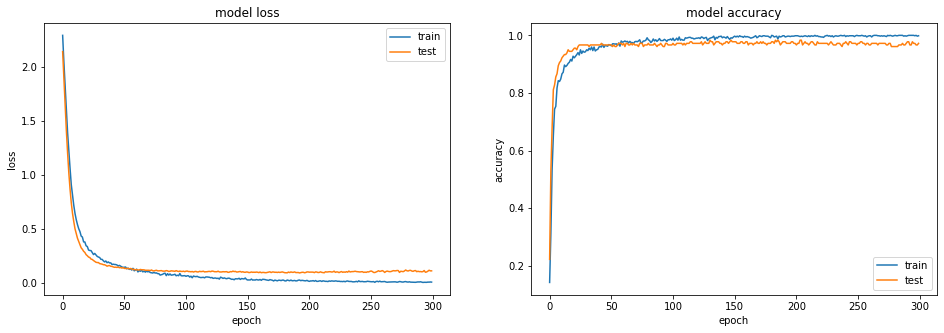

In [120]:
plot_training(history_fcc)

# Calculate accuracy on entire test set
_, train_acc = fcc.evaluate(x_train, y_train, verbose=0)
_, test_acc = fcc.evaluate(x_test, y_test, verbose=0)
print("Training accuracy: {:.1f}%".format(train_acc * 100.))
print("Testing accuracy: {:.1f}%".format(test_acc * 100.))

# Can you design a network to achieve a test accuracy better than 98.1%?

# AutoKeras - Automated Machine Learning
With AutoKeras, we can set up machine learning mode and train it in two lines of code!
* Line 1: ```clf = ImageClassifier(...)``` - We set up the *ImageClassifier()* class which will be our machine learning model to classify the handwritten digits. Since we are working with small images we only need a small model. Therefore we need to set *max_trials*=2 and *max_model_size*=23,555,082.
* Line 2: ```clf.fit(...)``` - This fits the 

In [18]:
from autokeras import ImageClassifier

In [19]:

# Set up the classifier
clf = ImageClassifier(max_trials=2, max_model_size=23555082, overwrite=True)

# Train the model
history_cnn = clf.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Print the accuracy of the best model
_, acc = clf.evaluate(x_test, y_test, verbose=False)
print("Testing accuracy: {:.1f}%".format(acc * 100.))

Trial 1 Complete [00h 00m 01s]
val_loss: 0.3128349483013153

Best val_loss So Far: 0.3128349483013153
Total elapsed time: 00h 00m 01s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
image_block_1/b...|resnet            |vanilla           
image_block_1/n...|True              |True              
image_block_1/a...|True              |False             
image_block_1/i...|True              |None              
image_block_1/i...|True              |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0.1               |None              
image_block_1/i...|0                 |None              
image_block_1/r...|False             |None              
image_block_1/r...|resnet50          |None              
image_block_1/r...|True              |None              
classification_...|global_avg        |flatten           
classification_...|0                 |0.5

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
for ax, name in zip(axes, ['loss','accuracy']):
    ax.plot(history_cnn.history[name])
    ax.plot(history_cnn.history['val_'+name])
    ax.set(title='model '+name, xlabel='epoch', ylabel=name)
axes[0].legend(['train', 'test'])
axes[1].legend(['train', 'test'])

In [ ]:
model = clf.export_model()
model.summary()